In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the csv file into pandas Dataframe
credit_data_df = pd.read_csv('Resources/credit_data_cleaned.csv')
credit_data_df.head()


,Unnamed: 0,month,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_new
0,0,January,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,None,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.083333333333332
1,1,February,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,None
2,3,April,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.333333333333332
3,4,May,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.416666666666668
4,5,June,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,No,49.574949,62.430172,Other,340.479212,Good,22.5


In [3]:
credit_data_df.nunique()

Unnamed: 0                  90677
month                           8
age                            42
occupation                     16
annual_income               13301
num_bank_accounts              14
num_credit_card                11
interest_rate                  34
num_of_loan                   379
type_of_loan                 6197
delay_from_due_date            73
num_of_delayed_payment        644
changed_credit_limit         4328
num_credit_inquiries         1154
credit_mix                      4
outstanding_debt            12113
credit_utilization_ratio    90677
payment_of_min_amount           3
total_emi_per_month         14548
amount_invested_monthly     82570
payment_behaviour               7
monthly_balance             88052
credit_score                    3
credit_history_age_new        405
dtype: int64

In [4]:
# credit_data_10 = pd.get_dummies(credit_data_9,prefix = ['credit_score'],columns=['credit_score'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in credit_data_df.columns:
    if (credit_data_df[i].dtypes == 'object'):
        credit_data_df[i] = le.fit_transform(credit_data_df[i])
       

In [5]:
credit_data_df.head()

,Unnamed: 0,month,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_new
0,0,3,23,13,19114.12,3,4,3,4,127,...,2,809.98,26.822620,1,49.574949,80.415295,2,312.494089,0,180
1,1,2,23,13,19114.12,3,4,3,4,127,...,1,809.98,31.944960,1,49.574949,118.280222,3,284.629162,0,404
2,3,0,23,13,19114.12,3,4,3,4,127,...,1,809.98,31.377862,1,49.574949,199.458074,5,223.451310,0,183
3,4,7,23,13,19114.12,3,4,3,4,127,...,1,809.98,24.797347,1,49.574949,41.420153,1,341.489231,0,184
4,5,5,23,13,19114.12,3,4,3,4,127,...,1,809.98,27.262259,1,49.574949,62.430172,6,340.479212,0,185


In [6]:
# assign data to x and y

# X = credit_data_df[["month","age","occupation","annual_income","num_bank_accounts","num_credit_card","interest_rate",
# "num_of_loan","type_of_loan","delay_from_due_date","num_of_delayed_payment","outstanding_debt","credit_utilization_ratio",
# ,"total_emi_per_month","amount_invested_monthly","monthly_balance"]]

X = credit_data_df[["annual_income","type_of_loan","outstanding_debt","credit_utilization_ratio"]]

# changed_credit_limit breaks the model

# X=credit_data_df.drop(columns=["credit_score","changed_credit_limit"])
# later on re-implement changed_credit_limit

y = credit_data_df["credit_score"].values.reshape(-1,1)
print(X.shape, y.shape)

(90677, 4) (90677, 1)


In [7]:
# create training and testing data
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [8]:
# create model using linear regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100)


In [9]:
# Create a StandardScater model and fit to the training data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler().fit(X_train)
y_scaler = RobustScaler().fit(y_train)

# Use the X_scaler/y_scaler to transform
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
#fit the model to the training data & calculate training and testing data scores
model.fit(X_train, y_train)

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.29220521416912965
Testing Score: 0.2913542126157918


In [11]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)


In [12]:
y_scaler = credit_data_df["credit_score"].values.reshape(-1,1)

In [13]:
X_test.dtypes

annual_income               float64
type_of_loan                  int32
outstanding_debt            float64
credit_utilization_ratio    float64
dtype: object

Text(0.5, 1.0, 'annual_income vs. credit score')

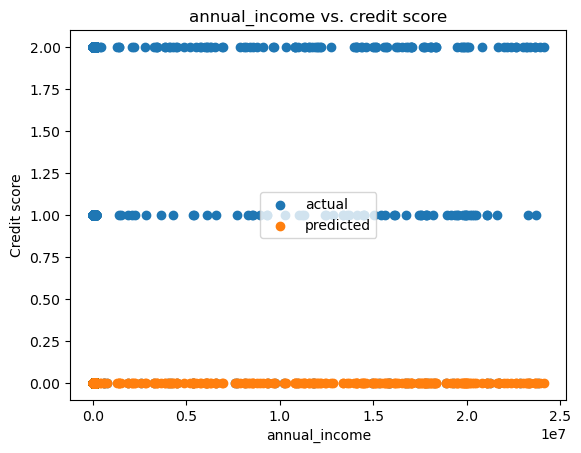

In [14]:
X2 = X_test["annual_income"]

plt.scatter(X2, y_test, label="actual")
plt.scatter(X2, y_scaler[model.predict(X_test_scaled)], label= "predicted")

plt.legend()

plt.xlabel("annual_income")
plt.ylabel("Credit score")
plt.title("annual_income vs. credit score")

# plt.savefig("Resources/IncomeVsCredit_score.png", bbox_inches='tight')

In [15]:
X3 = X_test["num_of_loan"]

plt.scatter(X2, y_test, label="actual")
plt.scatter(X2, y_scaler.inverse_transform(model.predict(X_test_scaled)), label= "predicted")

plt.legend()

plt.xlabel("num_of_loan")
plt.ylabel("Credit score")
plt.title("number of loans vs. credit score")

# plt.savefig("Resources/numberofloansVsCredit_score.png", bbox_inches='tight')

KeyError: 'num_of_loan'

In [ ]:
# Score data based on scaled model
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.gca().set(xlabel='Age, Income, Interest rate,...', ylabel='Credit Score')
plt.show()

plt.savefig("Resources/residual_plot.png", bbox_inches='tight')

plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [18]:
knn.fit(X_train_scaled , y_train_scaled)

KNeighborsClassifier(weights='distance')

In [19]:
knn.score(X_train_scaled , y_train_scaled)

1.0

In [20]:
knn.score(X_test_scaled , y_test_scaled)

0.5893250992501102

In [22]:
Y_pred = model.predict(X_test_scaled)
data = pd.DataFrame(Y_pred)

In [25]:
data

,0
0,2
1,2
2,0
3,1
4,2
...,...
22665,0
22666,1
22667,1
22668,1


In [28]:
y_train

array([[2],
       [1],
       [2],
       ...,
       [1],
       [2],
       [1]])

# RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(max_features=5 ,    max_depth=4)

In [31]:
rf.fit(X_train_scaled , y_train_scaled)

RandomForestClassifier(max_depth=4, max_features=5)

In [32]:
rf.score(X_train_scaled , y_train_scaled)

0.6138779831487935

In [33]:
rf.score(X_test_scaled , y_test_scaled)

0.6108954565505073

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

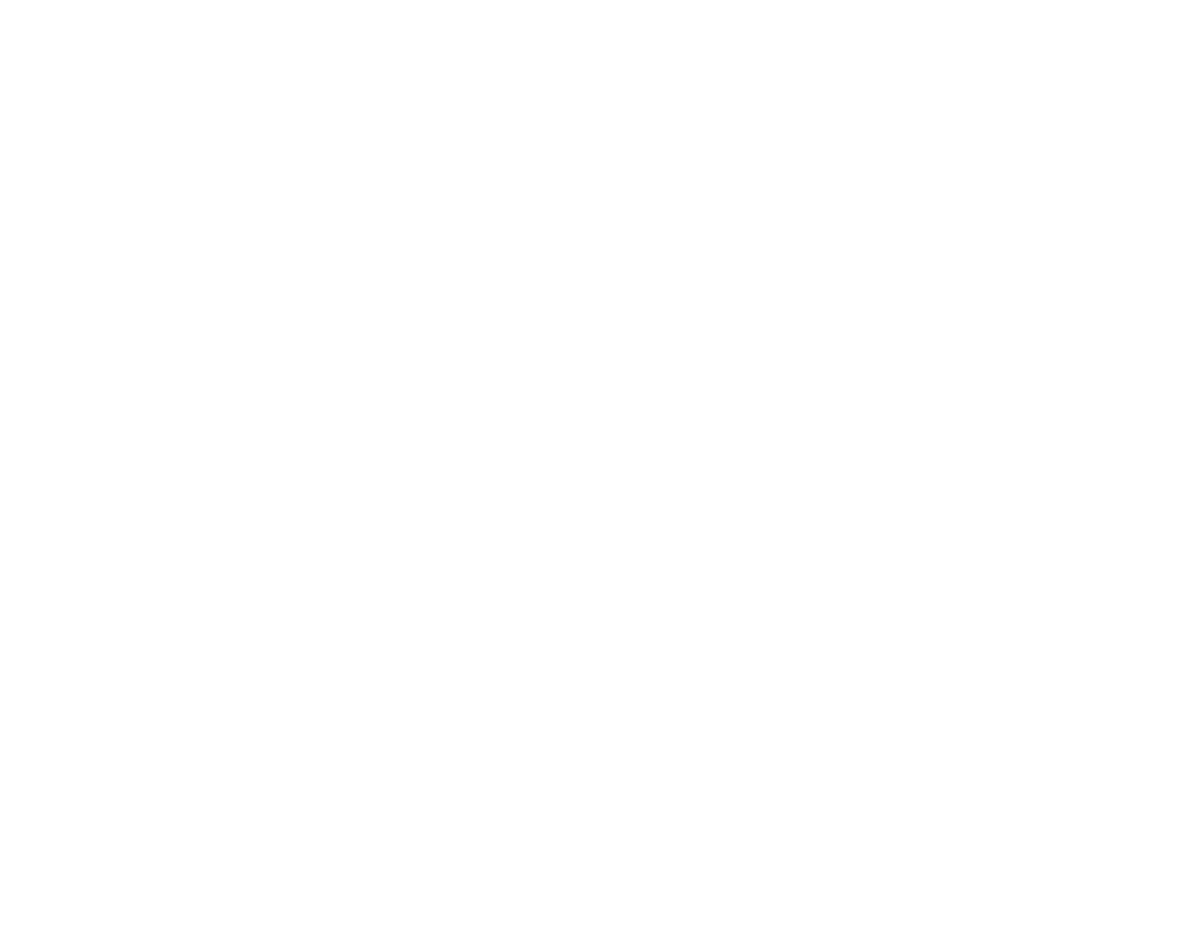

In [38]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(rf , filled=True)